In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trenes = pd.read_csv("/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/viajes-en-tren-sample.csv")
trenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   company        1000000 non-null  object 
 1   origin         1000000 non-null  object 
 2   destination    1000000 non-null  object 
 3   departure      1000000 non-null  object 
 4   arrival        1000000 non-null  object 
 5   duration       1000000 non-null  float64
 6   vehicle_type   1000000 non-null  object 
 7   vehicle_class  1000000 non-null  object 
 8   price          1000000 non-null  float64
 9   fare           1000000 non-null  object 
 10  seats          1000000 non-null  int64  
 11  meta           1000000 non-null  object 
 12  insert_date    1000000 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 99.2+ MB


In [3]:
trenes.head()


,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,renfe,MADRID,BARCELONA,2021-01-26 16:30:00,2021-01-26 19:15:00,2.75,AVE,Turista,64.25,Promo +,325,"{""Turista"": {""Promo +"": {""price"": 64.25, ""seat...",2020-12-14 12:00:00
1,renfe,BARCELONA,ZARAGOZA,2021-02-12 08:30:00,2021-02-12 10:16:48,1.78,AVE,Turista,33.50,Promo +,289,"{""Turista"": {""Promo +"": {""price"": 33.5, ""seats...",2021-01-22 06:00:00
2,renfe,MADRID,LEON,2021-01-21 13:25:00,2021-01-21 16:44:12,3.32,LD-AVE,Turista con enlace,41.85,Promo +,181,"{""Turista con enlace"": {""Promo +"": {""price"": 4...",2021-01-18 12:00:00
3,renfe,MADRID,VALENCIA,2021-02-21 06:20:00,2021-02-21 12:54:48,6.58,REGIONAL,Turista,28.35,Adulto ida,188,"{""Turista"": {""Adulto ida"": {""price"": 28.35, ""s...",2021-01-17 12:00:00
4,renfe,MADRID,BARCELONA,2020-10-27 07:40:00,2020-10-27 13:55:00,6.25,AVE-LD,Turista con enlace,43.50,Promo +,207,"{""Turista con enlace"": {""Promo +"": {""price"": 4...",2020-10-16 08:00:00


Veamos en las columnas la cantidad de valores diferentes que presentan. Las vamos a convertir en datos numéricos

In [4]:
# COLUMNA  DE CIUDADES DE ORIGEN
print(trenes["origin"].unique())
print("Total de ciudades:",len(trenes["origin"].unique()))

['MADRID' 'BARCELONA' 'CÓRDOBA' 'SEVILLA' 'ZARAGOZA' 'CORDOBA' 'VALENCIA'
 'VALLADOLID' 'LEÓN' 'MALAGA' 'MÁLAGA' 'LEON']
Total de ciudades: 12


In [5]:
trenes['origin'] = trenes['origin'].str.replace('CÓRDOBA','CORDOBA')
trenes['origin'] = trenes['origin'].str.replace('LEÓN','LEON')
trenes['origin'] = trenes['origin'].str.replace('MÁLAGA','MALAGA')
print(trenes["origin"].unique())
print("Total de ciudades:",len(trenes["origin"].unique()))

le = preprocessing.LabelEncoder()
le.fit(trenes['origin'])
trenes['origin_le'] = le.transform(trenes['origin'])

['MADRID' 'BARCELONA' 'CORDOBA' 'SEVILLA' 'ZARAGOZA' 'VALENCIA'
 'VALLADOLID' 'LEON' 'MALAGA']
Total de ciudades: 9


In [6]:
#CIUDADES DE DESTINO

trenes['destination'] = trenes['destination'].str.replace('CÓRDOBA','CORDOBA')
trenes['destination'] = trenes['destination'].str.replace('LEÓN','LEON')
trenes['destination'] = trenes['destination'].str.replace('MÁLAGA','MALAGA')
print(trenes["destination"].unique())
print("Total de ciudades:",len(trenes["destination"].unique()))

le.fit(trenes['destination'])
trenes['destination_le'] = le.transform(trenes['destination'])

['BARCELONA' 'ZARAGOZA' 'LEON' 'VALENCIA' 'MADRID' 'VALLADOLID' 'SEVILLA'
 'MALAGA' 'CORDOBA']
Total de ciudades: 9


In [7]:
#COLUMNA DE TIPOS DE TRENES
print(trenes["vehicle_type"].unique())
print("Tipo de trenes:",len(trenes["vehicle_type"].unique()))

['AVE' 'LD-AVE' 'REGIONAL' 'AVE-LD' 'ALVIA' 'AVANT' 'EUROMED' 'REG.EXP.'
 'Intercity' 'TORRE ORO' 'MD' 'LD' 'MD-AVE' 'LD-AVANT' 'AVE-MD' 'MD-LD'
 'LD-MD' 'INTERCITY']
Tipo de trenes: 18


In [8]:

trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('LD-AVE','AVE')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('AVE-LD','AVE')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('MD-AVE','AVE')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('AVE-MD','AVE')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('REGIONAL','REG.EXP')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('MD-LD','MD')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('LD-MD','LD')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('LD-AVANT','AVANT')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('REGIONAL.','REG.EXP')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('Intercity','INTERCITY')
trenes['vehicle_type'] = trenes['vehicle_type'].str.replace('REG.EXP.','REG.EXP')

print(trenes["vehicle_type"].unique())
print("Tipo de trenes:",len(trenes["vehicle_type"].unique()))

le.fit(trenes['vehicle_type'])
trenes['vehicle_type_le'] = le.transform(trenes['vehicle_type'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


['AVE' 'REG.EXP' 'ALVIA' 'AVANT' 'EUROMED' 'INTERCITY' 'TORRE ORO' 'MD'
 'LD']
Tipo de trenes: 9


In [9]:
#COLUMNA DE CLASE 
print(trenes["vehicle_class"].unique())
print("Clase:",len(trenes["vehicle_class"].unique()))

['Turista' 'Turista con enlace' 'Turista Plus' 'Turista - Turista Plus'
 'Turista Plus - Turista']
Clase: 5


In [10]:
trenes['vehicle_class'] = trenes['vehicle_class'].str.replace('Turista - Turista Plus','Turista')
trenes['vehicle_class'] = trenes['vehicle_class'].str.replace('Turista Plus - Turista','Turista Plus')

print(trenes["vehicle_class"].unique())
print("Clase:",len(trenes["vehicle_class"].unique()))

le.fit(trenes['vehicle_class'])
trenes['vehicle_class_le'] = le.transform(trenes['vehicle_class'])

['Turista' 'Turista con enlace' 'Turista Plus']
Clase: 3


In [11]:
#COLUMNA DE TARIFA
print(trenes["fare"].unique())

le.fit(trenes['fare'])
trenes['fare_le'] = le.transform(trenes['fare'])

['Promo +' 'Adulto ida' 'Flexible']


In [12]:
#COLUMNA DE COMPAÑIA
print(trenes["company"].unique())

['renfe']


In [13]:
trenes['departure'] = pd.to_datetime(trenes['departure'])
trenes['Month'] = trenes['departure'].dt.month
trenes['Day'] = trenes['departure'].dt.day
trenes['Day of the week'] = trenes['departure'].dt.dayofweek
trenes['Hour'] = trenes['departure'].dt.hour

In [14]:
trenes.head(3)

,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,...,insert_date,origin_le,destination_le,vehicle_type_le,vehicle_class_le,fare_le,Month,Day,Day of the week,Hour
0,renfe,MADRID,BARCELONA,2021-01-26 16:30:00,2021-01-26 19:15:00,2.75,AVE,Turista,64.25,Promo +,...,2020-12-14 12:00:00,3,0,2,0,2,1,26,1,16
1,renfe,BARCELONA,ZARAGOZA,2021-02-12 08:30:00,2021-02-12 10:16:48,1.78,AVE,Turista,33.50,Promo +,...,2021-01-22 06:00:00,0,8,2,0,2,2,12,4,8
2,renfe,MADRID,LEON,2021-01-21 13:25:00,2021-01-21 16:44:12,3.32,AVE,Turista con enlace,41.85,Promo +,...,2021-01-18 12:00:00,3,2,2,2,2,1,21,3,13


Construimos el DataFrame sobre el que poder modelar

In [15]:
df = trenes.drop(['company', 'origin', 'destination', 'departure', 'arrival', 'vehicle_type', 'vehicle_class', 'fare', 'meta', 'insert_date'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   duration          1000000 non-null  float64
 1   price             1000000 non-null  float64
 2   seats             1000000 non-null  int64  
 3   origin_le         1000000 non-null  int64  
 4   destination_le    1000000 non-null  int64  
 5   vehicle_type_le   1000000 non-null  int64  
 6   vehicle_class_le  1000000 non-null  int64  
 7   fare_le           1000000 non-null  int64  
 8   Month             1000000 non-null  int64  
 9   Day               1000000 non-null  int64  
 10  Day of the week   1000000 non-null  int64  
 11  Hour              1000000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 91.6 MB


Analizamos las variables

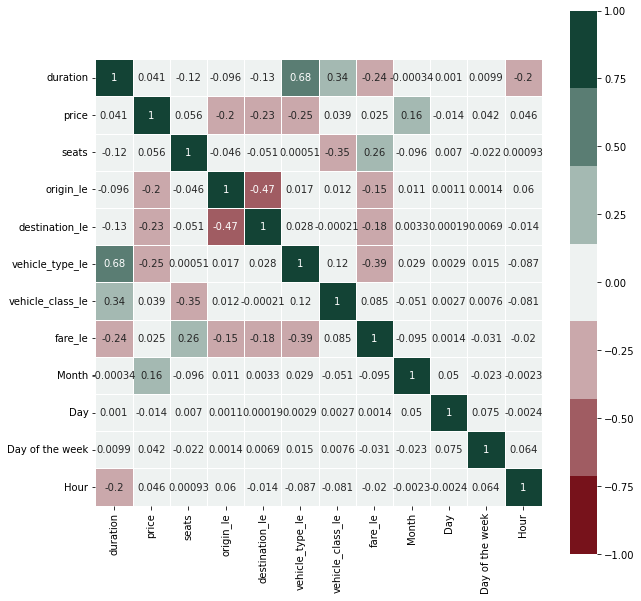

In [16]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(10, 880, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

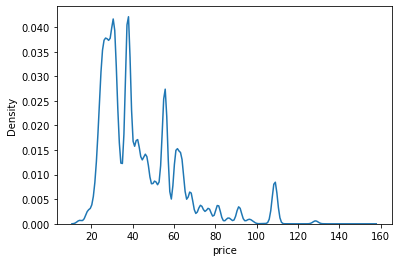

In [18]:
sns.distplot(df['price'], hist = False)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

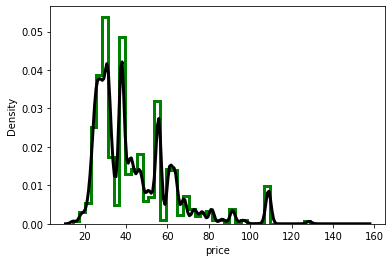

In [19]:
sns.distplot(df['price'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"})

In [23]:
#df1 = np.log(df+1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

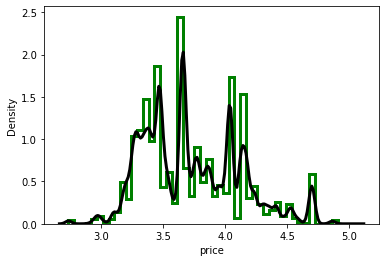

In [25]:
#sns.distplot(df1['price'],
            #kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            #hist_kws={"histtype": "step", "linewidth": 3,
                      #"alpha": 1, "color": "g"})

Regresion lineal

In [19]:
df.columns

Index(['duration', 'price', 'seats', 'origin_le', 'destination_le',
       'vehicle_type_le', 'vehicle_class_le', 'fare_le', 'Month', 'Day',
       'Day of the week', 'Hour'],
      dtype='object')

In [20]:
X = df[['duration','seats','origin_le','destination_le','vehicle_type_le','vehicle_class_le','fare_le','Month','Day','Day of the week','Hour']]
y = df["price"]


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score

model = LinearRegression(n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [22]:
model.predict(X_test)

array([45.57287268, 31.85241657, 39.353214  , ..., 39.36346757,
       34.03640241, 36.08322488])

In [23]:
print("MSE", mean_squared_error(y_test, model.predict(X_test)))
print("RMSE", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("MAE", mean_absolute_error(y_test, model.predict(X_test)))
print('R2 score', r2_score(y_test, model.predict(X_test)))

MSE 244.73285995059138
RMSE 15.643940039216188
MAE 12.328505155915426
R2 score 0.3561712051391519


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

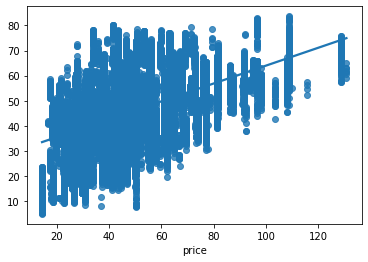

In [24]:
sns.regplot(y_test, model.predict(X_test))

In [25]:
from sklearn.preprocessing import PolynomialFeatures

model_poly = PolynomialFeatures(degree = 3)

model_poly.fit(X_train)
X_poly = model_poly.transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [27]:
X_poly_test = model_poly.transform(X_test)
print('The model performance for test set')
print('--------------------------------------')
print('MAE test', mean_absolute_error(y_test, pol_reg.predict(X_poly_test)))
print('MSE test', mean_squared_error(y_test, pol_reg.predict(X_poly_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print('R2 score', r2_score(y_test, pol_reg.predict(X_poly_test)))


The model performance for test set
--------------------------------------
MAE test 5.261863705241361
MSE test 61.11059297959403
RMSE test 7.817326459832289
R2 score 0.8392338509866347


In [46]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators= 30)

model_RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [47]:
model_RF.predict(X_test)

print("MSE", mean_squared_error(y_test, model_RF.predict(X_test)))
print("RMSE", np.sqrt(mean_squared_error(y_test, model_RF.predict(X_test))))
print("MAE", mean_absolute_error(y_test, model_RF.predict(X_test)))
print('R2 score', r2_score(y_test, model_RF.predict(X_test)))

MSE 5.9344548225612845
RMSE 2.436073648837671
MAE 0.7378697133599244
R2 score 0.984384242906949


In [ ]:
plt.figure(figsize=(10,6), dpi=100)
sns.regplot(y_test, model_RF.predict(X_test))